# Gradiente Descendente

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

<IPython.core.display.Javascript object>


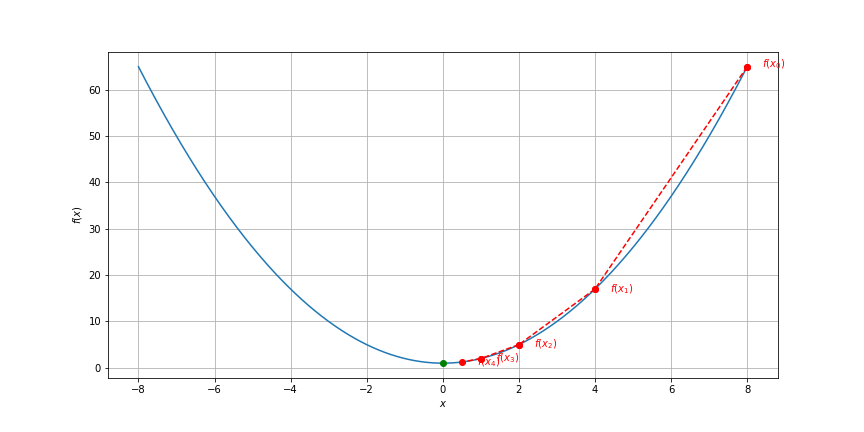

In [58]:
# Ejemplo 1 - Gradiente Descendente (Polinomio 2do orden)

x = np.linspace(-8,8,1001)

fx = lambda x: x**2 + 1

plt.figure(figsize=[12,6])
plt.plot(x,fx(x))
plt.grid('on')
ax = plt.gca()
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

xk = 8
mu = 0.25
#mu = 0.8

yk = fx(xk)
#plt.plot([xk,xk],[0,yk],'r--')
plt.plot(xk,yk,'ro')
plt.text(xk+0.4,yk-0.2,'$f(x_0)$',color='r')

for k in range(1,5):
    x0 = xk
    y0 = fx(x0)
    xk = x0 - mu*2*x0
    yk = fx(xk)
    plt.plot([x0,xk],[y0,yk],'ro--')
    plt.text(xk+0.4,yk,'$f(x_'+str(k)+')$',color='r',va='center')

plt.plot(0,1,'go')


<IPython.core.display.Javascript object>


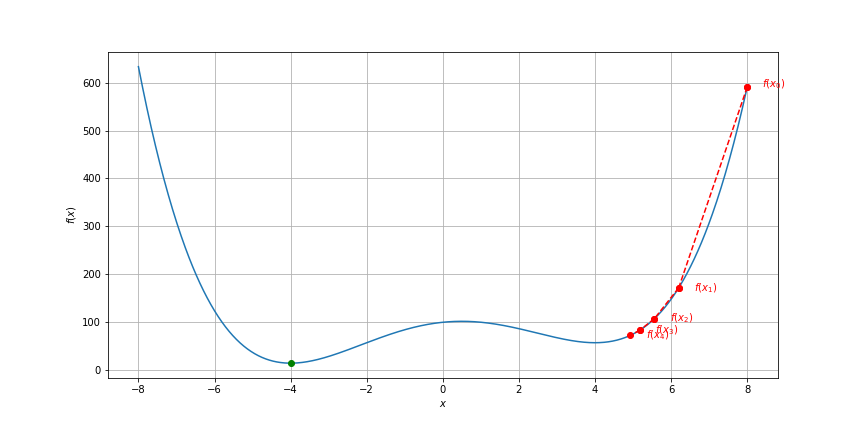

In [59]:
# Ejemplo 2 - Gradiente Descendente (Polinomio 4to orden)

x = np.linspace(-8,8,1001)
fx = lambda x: (x**4)/4 - (x**3)/6 - 8*(x**2) + 8*x + 100
dfx = lambda x: (x**2-16)*(x-0.5)

plt.figure(figsize=[12,6])
plt.plot(x,fx(x))
plt.grid('on')
ax = plt.gca()
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

xk = 8
#mu = 0.0437
mu = 0.005

yk = fx(xk)
#plt.plot([xk,xk],[0,yk],'r--')
plt.plot(xk,yk,'ro')
plt.text(xk+0.4,yk-0.2,'$f(x_0)$',color='r')

for k in range(1,5):
    x0 = xk
    y0 = fx(x0)
    xk = xk - mu*dfx(xk)
    yk = fx(xk)
    plt.plot([x0,xk],[y0,yk],'ro--')
    plt.text(xk+0.4,yk,'$f(x_'+str(k)+')$',color='r',va='center')

plt.plot(-4,fx(-4),'go')

<IPython.core.display.Javascript object>


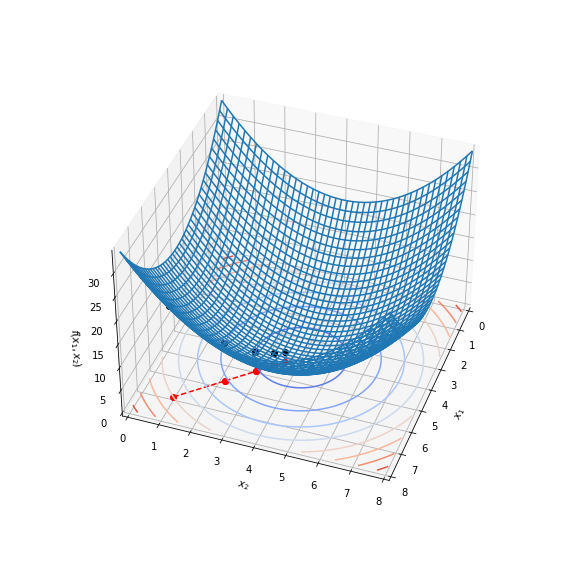

In [76]:
x = np.linspace(0,8,301)
y = np.linspace(0,8,301)

fxy = lambda x,y: (x-4)**2 + (y-4)**2 + 2
gf = lambda x,y: np.array([2*(x-4),2*(y-4)])

xx, yy = np.meshgrid(x,y)
zz = fxy(xx,yy)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[8,8])
#surf = ax.plot_surface(xx,yy,zz,cmap=cm.coolwarm)
surf = ax.plot_wireframe(xx,yy,zz,cmap=cm.coolwarm)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

ax.contour(xx,yy,zz,cmap=cm.coolwarm,offset=0)

ax.set_xlim([0,8])
ax.set_ylim([0,8])
ax.set_zlim([0,np.max(zz[:])])

rk = [7,1]
fk = fxy(rk[0],rk[1])
mu = 0.2

for k in range(1,5):
    r0 = rk
    f0 = fk
    
    gfk = gf(r0[0],r0[1])
    rk = rk - mu*gfk
    fk = fxy(rk[0],rk[1])
    ax.plot([r0[0],rk[0]],[r0[1],rk[1]],'ro--',zs=0)
    ax.plot([r0[0],rk[0]],[r0[1],rk[1]],[f0,fk],'ko')

#ax.view_init(elev=15, azim=-45)

plt.savefig('fadap_3.pdf')